<a href="https://colab.research.google.com/github/WetSuiteLeiden/data-collection/blob/master/api_koop_op.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Purpose of this notebook

Using KOOP's SRU interface to Officiele Publicaties.

We were first mostly interested in fetching the Parliamentary documents, specifically: Kamerstukken, Handelingen, Aanhangsels bij de Handelingen,
and eventually also fetched most other documents.

This in part to show that interface, and also once again to make some sample datasets for you to start some experiments on, without doing all this prep work.

# Noting the bulk, suggesting how to fetch less

Bulk download was somewhat interesting for us to create large datasets, but you can expect that to take months.

And most legal research interests can be served by a small subset of documents. 

Even if you here for the NLP-ish "more data means better training and cleaner output" side of things,
you may still only care to have _enough_ representative data to prove that something works or not, not _everything_.

Various statistics that follow are from the now-retired KOOP BulkUitleesSysteem (BUS), not this SRU interface,
but the data they provide should be more or less equivalent and (multiple equivalent document types for each conceptual document,
for seemingly the same areas, decentral government and parliamentary), and  we assume the summaries are representative.

### Per year 

Not everything goes back equally far, 
but even if this store goes back merely three decades for an area,
a lot of research won't be interested in everything.

This is not as helpful in terms of bytes to be fetched, though,
because many people's time preference will still be 
"in the last few years", which is where most of the size is.

Consider the following estimates (from BUS):
- up to 1995, there are fewer than three thousand items (<1GB) pear year, 
- up to 2010 or so, there are fewer than a hundred thousand items per year (<10GB),
- since 2015 or so, there are more than one million (>100GB) per year.
<!--
From an earlier estimate:
    1951    0.4GiB  in 2312 items
    1952    0.4GiB  in 2708 items
    1953    0.4GiB  in 2502 items
    1954    0.5GiB  in 2839 items
    1955    0.4GiB  in 2516 items
    1956    0.1GiB  in 714 items
    1957    0.4GiB  in 2757 items
    1958    0.4GiB  in 2763 items
    1959    0.1GiB  in 988 items
    1960    0.4GiB  in 2435 items
    1961    0.4GiB  in 2228 items
    1962    0.4GiB  in 2418 items
    1963    0.5GiB  in 2599 items
    1964    0.4GiB  in 2559 items
    1965    0.4GiB  in 2277 items
    1966    0.5GiB  in 3101 items
    1967    0.5GiB  in 2992 items
    1968    0.5GiB  in 2969 items
    1969    0.5GiB  in 2989 items
    1970    0.5GiB  in 2821 items
    1971    0.6GiB  in 3476 items
    1972    0.5GiB  in 3006 items
    1973    0.4GiB  in 2835 items
    1974    0.5GiB  in 3531 items
    1975    0.5GiB  in 2928 items
    1976    0.5GiB  in 2335 items
    1977    0.5GiB  in 3136 items
    1978    0.5GiB  in 2992 items
    1979    0.5GiB  in 3197 items
    1980    0.5GiB  in 3085 items
    1981    0.8GiB  in 3391 items
    1982    0.5GiB  in 3277 items
    1983    0.6GiB  in 3018 items
    1984    0.5GiB  in 2786 items
    1985    0.7GiB  in 3123 items
    1986    0.8GiB  in 3153 items
    1987    0.6GiB  in 2838 items
    1988    0.6GiB  in 2890 items
    1989    0.7GiB  in 2760 items
    1990    0.7GiB  in 2789 items
    1991    0.9GiB  in 3138 items
    1992    1.0GiB  in 3134 items
    1993    1.0GiB  in 3172 items
    1994    1.4GiB  in 4517 items
    1995    0.8GiB  in 39622 items
    1996    1.2GiB  in 45314 items
    1997    1.1GiB  in 47408 items
    1998    1.2GiB  in 49838 items
    1999    1.2GiB  in 51435 items
    2000    1.5GiB  in 53020 items
    2001    1.4GiB  in 56090 items
    2002    1.4GiB  in 54066 items
    2003    2.0GiB  in 56601 items
    2004    2.8GiB  in 71615 items
    2005    3.2GiB  in 75437 items
    2006    4.1GiB  in 75540 items
    2007    3.7GiB  in 83246 items
    2008    5.3GiB  in 116773 items
    2009   10.4GiB  in 153092 items
    2010   14.2GiB  in 151182 items
    2011   16.2GiB  in 183402 items
    2012   17.0GiB  in 172700 items
    2013   28.3GiB  in 242026 items
    2014   69.6GiB  in 674221 items
    2015   85.0GiB  in 1228900 items
    2016   108.5GiB  in 1565751 items
    2017   121.7GiB  in 1810840 items
    2018   148.8GiB  in 2163365 items
    2019   184.1GiB  in 2408816 items
    2020   204.7GiB  in 2691715 items
    2021   246.2GiB  in 3379992 items
    2022   274.8GiB  in 3826413 items
    2023   275.9GiB  in 3747576 items
-->

### Per area

The identifiers used in these systems suggest a division into what we here choose to call areas (there is presumably a better name, but I don't know it yet).

Consider the following areas, and their proportional **byte sizes** in BUS:

      stcrt      15%
        stb       1%
        
        gmb      68%
        prb       2%
        wsb       3%
        bgr      <1%
        trb      <1%
        
And, on the parliament side:

        kst       2%
        blg       5%
          h      <1%
         ah      <1%
         ag      <1%
         kv      <1%
        nds      <1%

Chances are you are only interested in one at a time, _maybe_ a few.
<!--
   stcrt      290GiB  in 2696820 items
     stb       27GiB  in 166383 items

     gmb      1.3TiB  in 19741765 items
     prb       35GiB  in 598689 items
     wsb       51GiB  in 806582 items
     trb      7.5GiB  in 72188 items
     bgr        6GiB  in 59372 items

     kst       50GiB  in 1468147 items
     blg      108GiB  in 224335 items
       h       17GiB  in 251524 items
      ah      4.6GiB  in 374254 items
      ag      230MiB  in 9049 items
      kv      2.4GiB  in 269221 items
     nds      1.6GiB  in 58569 items
-->

The following is a **count** (not total bytes) **of most of the documents there**, split per area and then per file type.
Again, from BUS data.

Note that the scale says 1e7, i.e. ***tens*** of millions:

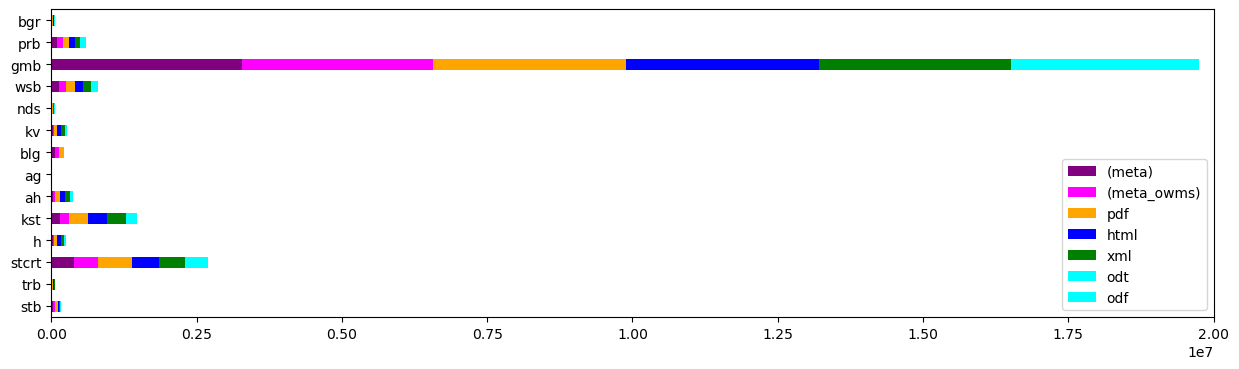

And, if you prefer XML over HTML over PDF, and get just one of the metadata formats this is the reduction in count of that same set:

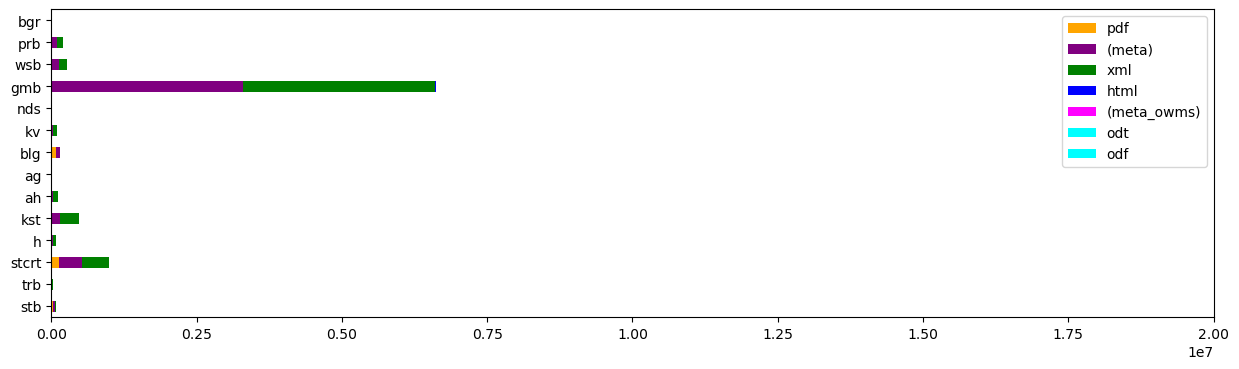

Six million items is still a _lot_, but it's also significantly less than twenty-six million. And since we avoid fetching most PDFs, we avoid the bulk of bytes as well, whichi is a nice detail if and when we are interested only in the plain text.


### Per filetype

Each search result is document-in-concept. It has metadata describing it, and then refers to multiple files - each in a different format but with _equivalent_ content.

In that system, the distribution of **byte size per document type** is roughly:

               pdf    70%
        odt or odf    21%
              html     6%
          data xml     2%
      metadata xml     1%
<!--
More precisely, but now somewhat older:
     pdf     1.4TiB  in 4846464 items
     odt     381GiB  in 3974450 items
     odf    12.5GiB  in 217162 items
html.zip     123GiB  in 4584570 items
    html     302MiB  in 12812 items
     xml      36GiB  in 4598118 items
  (meta)      17GiB  in 8563796 items
-->

Some things are available in only few formats (e.g. old scans in only PDF), but most things are available in most of office document, and HTML, and XML, and PDF form.

If we are fetching documents only for the text content, then one is enough, and what you prefer is up to you.
We preferred XML for its smaller size, which let us avoid fetching 20+ million of ~26 million files, which is also a terabyte and a half less storage.

You may not prefer XML. A good case might be made for office-style documents as well, with stronger structure that, given a little more time and effort, 
might actually be better for filtering out non-content on each page.

...but, as it turns out, that doesn't always _quite_ work.

There are a number of cases, within e.g. the `blg` (bijlages) set, (the following example is `blg-134645`) which have have [perfectly sensible metadata](https://zoek.officielebekendmakingen.nl/blg-134645/metadata.xml), point to [XML that contains nothing](https://repository.overheid.nl/frbr/officielepublicaties/blg/onopgemaakt/blg-134645/1/xml/blg-134645.xml) but a perfectly viewable [PDF](https://repository.overheid.nl/frbr/officielepublicaties/blg/onopgemaakt/blg-134645/1/pdf/blg-134645.pdf). 

Presumably this is because of 'documents that did not originate here' reasons or, perhaps more precisely, 'documents that do not come from our own templates'. 
That theory seems holds for...
- similar cases within `nds`, e.g. `nds-ocw0400097-b2`: [example xml](https://repository.overheid.nl/frbr/officielepublicaties/nds/overig/nds-ocw0400097-b2/1/xml/nds-ocw0400097-b2.xml) and [according PDF](https://repository.overheid.nl/frbr/officielepublicaties/nds/overig/nds-ocw0400097-b2/1/pdf/nds-ocw0400097-b2.pdf).
- kamerstukken, where it is more rare, and seemingly identified by identifiers that end with `-b1` or such, which presumably are external documents that _are_ included in the dossier, e.g. `kst-31200-VII-45-b1`: an [empty XML](https://repository.overheid.nl/frbr/officielepublicaties/kst/31200-VII/kst-31200-VII-45-b1/1/xml/kst-31200-VII-45-b1.xml) and a [useful PDF](https://repository.overheid.nl/frbr/officielepublicaties/kst/31200-VII/kst-31200-VII-45-b1/1/pdf/kst-31200-VII-45-b1.pdf)
- various tractaten, perhaps mainly the older ones, e.g. `trb-1983-32`, where the search result points to [sensible metadata](https://repository.overheid.nl/frbr/officielepublicaties/trb/1983/trb-1983-32/1/metadata/metadata.xml), an [XML data](https://repository.overheid.nl/frbr/officielepublicaties/trb/1983/trb-1983-32/1/xml/trb-1983-32.xml) that happens to be empty, and [a PDF](https://repository.overheid.nl/frbr/officielepublicaties/trb/1983/trb-1983-32/1/pdf/trb-1983-32.pdf).
- there seems to be a single case, within `stb`, that is, one document split into four.
- there are also cases where the XML template seems more detailed, but devoid of text, e.g. [this XML](https://repository.overheid.nl/frbr/officielepublicaties/blg/onopgemaakt/blg-109225/1/xml/blg-109225.xml) for [this PDF](https://repository.overheid.nl/frbr/officielepublicaties/blg/onopgemaakt/blg-109225/1/pdf/blg-109225.pdf)
- there are cases where the XML mostly just says "Deze agenda is niet beschikbaar in HTML-formaat", e.g. [ag-ek-1995-02-08.xml](https://repository.overheid.nl/frbr/officielepublicaties/ag-ek/1995/ag-ek-1995-02-08/1/xml/ag-ek-1995-02-08.xml)


Notes: 
- for the `blg` we can see `/onopgemaakt/` in the URL and could _assume_ that we should fetch the PDF instead of the probably-empty XML, avoiding pointless fetches
- ...but for the other cases there seems to be no indicator, and we would fetch the PDF _because_ the XML is empty. It leads to some unnecessary fetching, but is the more generic fix.
- a check for size isn't quite enough.   You will also discover some perfectly valid but very short, often one-sentence documents, e.g. within `gmb`, `h` 


# Some actual fetching

In [1]:
import collections, time, pprint, random, datetime

import wetsuite.helpers.notebook
import wetsuite.helpers.localdata
import wetsuite.datacollect.koop_sru
import wetsuite.helpers.koop_parse
import wetsuite.helpers.etree
import wetsuite.helpers.date

from wetsuite.helpers.date import date_first_day_in_year, date_last_day_in_year, date_first_day_in_month, yyyy_mm_dd, parse as date_parse

In [3]:
# a store to put downloads into:
op_fetched             = wetsuite.helpers.localdata.LocalKV( 'op_fetched.db', str, bytes )

# it turns out we also have reason to store each individual search record we saw
op_fetched_searchrecords   = wetsuite.helpers.localdata.LocalKV( 'op_fetched_searchrecords.db', key_type=str, value_type=bytes )

In [4]:
# note: there is an introduction into these SRU interfaces in another notebook
sru_op = wetsuite.datacollect.koop_sru.OfficielePublicaties()

sru_op.explain_parsed()

{'explain_url': 'https://repository.overheid.nl/sru?&version=1.2&x-connection=officielepublicaties&operation=explain',
 'database/numRecs': '6293516',
 'host': 'localhost',
 'port': '80',
 'title': None,
 'description': None,
 'extent': None,
 'indices': [('dt', 'type'),
  ('dt', 'audience'),
  ('dt', 'available'),
  ('dt', 'language'),
  ('dt', 'title'),
  ('dt', 'identifier'),
  ('dt', 'creator'),
  ('dt', 'modified'),
  ('dt', 'issued'),
  ('dt', 'created'),
  ('dt', 'date'),
  ('dt', 'spatial'),
  ('dt', 'temporal'),
  ('dt', 'abstract'),
  ('dt', 'alternative'),
  ('dt', 'source'),
  ('dt', 'hasVersion'),
  ('dt', 'subject'),
  ('dt', 'isFormatOf'),
  ('dt', 'description'),
  ('dt', 'isPartOf'),
  ('dt', 'isRequiredBy'),
  ('dt', 'isReplacedBy'),
  ('dt', 'hasPart'),
  ('dt', 'relation'),
  ('dt', 'requires'),
  ('dt', 'replaces'),
  ('dt', 'format'),
  ('ot', 'authority'),
  ('w', 'documenttype'),
  ('w', 'datumNotificatie'),
  ('w', 'titelNotificatie'),
  ('w', 'organisatietype'

That `explain` output implies that you can do queries like:
* `w.dossiernummer = 26100`
* `w.publicatienaam = Kamerstuk`
* `w.publicatienaam = Kamerstuk  AND  w.ondernummer > 0  AND  w.documentstatus = Opgemaakt'`
* `dt.identifier any kst-` seems to work if you want all of a type of document -- but see notes on bulkiness
* `dt.identifier any gmb-  AND  dt.spatial any Utrecht` (though you may wish to check the difference between TODO)
* ...and various more - read the actual output

Be aware, though, that 
- many of the indices you can select on apply only to _some_ documents 
  - e.g. w.dossiernummer will certainly filter out non-pariamentary things (mostly get 'kst', 'blg', 'h'?), but also many of the pariamentry documents that just don't belong to a dossier
  - ...which may be obvious with a case like dossiernummer, but may be less obvious around e.g. dt.spatial.  It is a good idea to doubt and check such assumptions.
  - but e.g. many things do not have a dt.abstract (VERIFY), and is it obvious to you why?
- some of these indices don't seem to work (VERIFY) or at least not do what you might expect, and
- it seems you may only be able to discover the values you can search for from earlier search results (CONSIDER: helping more).
<!--
ctdict =  collections.defaultdict(int)

def count_types(record_node):
    meta = wetsuite.helpers.koop_parse.parse_op_searchmeta( record_node, flatten=True )
    #pprint.pprint( meta )
    ids = meta['identifier']
    ctdict[ ids.split('-',1)[0] ] += 1


sru_op.search_retrieve_many(
    'w.dossiernummer > 0',
    at_a_time=1000, up_to=25000, # if you need more than this, consider being more specific, or chunking it up more
    callback=count_types,
    verbose=0
)

ctdict
-->

In [ ]:
count_fetchstatus = collections.defaultdict( int )
wait_more_sec = 0


def op_fetching_callback( record_node, verbose=0 ):
    ''' Helper function for fetching documents from searches you have done:
        reads search result records, picks out preferred URLs to fetch, and fetch them if we didn't have them already. 

        (also, does some counting and backoff and progressbar updates via globals - this function is tied to this notebook)

        
        This example only cares about having _a_ version of everything, 
        and due to simple code only stores the first version of any URL we see, and never re-fetches later.
        Things like pariamentary agendas change multiple times - we just have the first version.
        It isn't even a given, merely likely, that the metadata for a document was fetched at the same time.

        If you were to make an actual service out of this, you would 
         - store the modification date for each thing you fetch (or just the search records?), (so that we can...)
         - selectively re-fetch only things that have changed, and re-fetch all the documents within the id at the same time
         - if you wanted to see the actual modifications, would store all different versions you fetched in the past
    '''

    global sru_op, pbar, wait_more_sec  # in part to highlight to you that we're cheating with global variables
    pbar.value += 1

    meta = wetsuite.helpers.koop_parse.parse_op_searchmeta( record_node, flatten=True )
    if verbose:
        pprint.pprint( meta )
    ident = meta['identifier']

    # for now just put in the lastest. If you were to do the 'if changed since last time' this would come after something conditional
    op_fetched_searchrecords.put(ident, wetsuite.helpers.etree.tostring(record_node) )

    # For reference, manifestations is a dict that looks something like:
    #   {'metadata':     'https://repository.overheid.nl/frbr/officielepublicaties/gmb/2014/gmb-2014-20425/1/metadata/metadata.xml',
    #    'metadataowms': 'https://repository.overheid.nl/frbr/officielepublicaties/gmb/2014/gmb-2014-20425/1/metadataowms/metadata_owms.xml',
    #    'html':         'https://repository.overheid.nl/frbr/officielepublicaties/gmb/2014/gmb-2014-20425/1/html/gmb-2014-20425.html',
    #    'xml':          'https://repository.overheid.nl/frbr/officielepublicaties/gmb/2014/gmb-2014-20425/1/xml/gmb-2014-20425.xml'
    #    'pdf':          'https://repository.overheid.nl/frbr/officielepublicaties/gmb/2014/gmb-2014-20425/1/pdf/gmb-2014-20425.pdf' }
    # manifestation_keys would then be those keys, e.g.
    #   ['html','metadata','metadataowms','pdf','xml']
    # and chosen_keys might be
    #   ['metadata', 'xml']
    manifestations     = meta['manifestations']
    manifestation_keys = list(manifestations.keys())
    chosen_keys        = wetsuite.helpers.koop_parse.prefer_types(
        manifestation_keys,
        all_of          = ('metadata',),
        first_of        = ('xml','html','xhtml', 'odt','pdf', 'png'),    # xhtml and png seem like rare exception cases?
        never           = ('metadataowms',),           # duplicates 'metadata'
        require_present = (),
    )
    #print( 'Choice: %r -> %r'%( manifkeys, chosen_keys ) )    # debug output mentioning the choice just made

    for chosen_key in chosen_keys: # for the subset we just decided we want to fetch
        chosen_url = manifestations[chosen_key]
        try:
            docbytes, came_from_cache = wetsuite.helpers.localdata.cached_fetch( op_fetched, chosen_url, force_refetch=False )
            # count_fetchstatus 

            # Patchup we later learned was necessary: if XML has no data content, download PDF too
            if 'xml' in chosen_url  and  not 'metadata' in chosen_url  and  len(docbytes) < 700:
                if wetsuite.helpers.koop_parse.op_data_xml_seems_empty( docbytes ): 
                    if 'pdf' in manifestation_keys:
                        #print( f'...choosing to fetch PDF too: {manifestations["pdf"]}' )
                        _ignoredata, extra_came_from_cache = wetsuite.helpers.localdata.cached_fetch( op_fetched, manifestations['pdf'] )
                        if extra_came_from_cache:
                            count_fetchstatus['extrapdf_cached'] += 1
                        else:
                            count_fetchstatus['extrapdf_fetched'] += 1
                    else:
                        count_fetchstatus['dontknow'] += 1
                        print( f'TODO: add one of {manifestations.keys()}' )
          
            if not came_from_cache:
                wait_more_sec *= 0.9
                count_fetchstatus['fetched'] += 1
                #if wait_more > 0.3:
                #    print( 'longer wait:  %.1f sec'%wait_more )
                time.sleep( 1+wait_more_sec ) # be somewhat nice to the servers
            else:
                count_fetchstatus['cached'] += 1

        except ValueError as exc: # mainly expecting 404, 500, but also 429 backoffs
            count_fetchstatus['val_error'] += 1
            print( "ERROR downloading %s: %s  for %r"%(chosen_key, exc, chosen_url) )
            if '429' in str(exc): # back off whenever asked
                print('Saw 429 response, backing off more for a while')
                wait_more_sec  = 10
            time.sleep( 20 ) # be somewhat nicer to the servers
            
        except Exception as exc:
            count_fetchstatus['oth_error'] += 1
            print( "ERROR downloading %s: %s  for %r"%(chosen_key, exc, chosen_url) )
            time.sleep( 20 ) # be somewhat nicer to the servers

    pbar.description  = ', '.join( [ident]+list( '%s:%d'%(k, v)  for k,v in count_fetchstatus.items()) )

In [ ]:
for query in (
    #'w.dossiernummer = 26100',   # a small dossier,  currently containing 14 kst
    #'w.dossiernummer = 36200',   # a larger dossier, currently containing ~2400 kst and ~1200 blg-
    #'(dt.spatial ANY Utrecht)',         # containing  stcrt:2.1K gmb: 1.8K prb:~700, bgr:120, wsb:58
    #'(dt.identifier any gmb-) AND (dt.spatial ANY Utrecht)',   # just the gmb from that
    #'(dt.spatial ANY Utrecht) NOT (dt.identifier any gmb-)',   # everything other than gmb from that
    #TODO: more interesting example queries

    # Or even fetch-everything-in-a-section -- note that this will take something between a long and a LONG time
    #                                                                                       
    #'(dt.identifier any ag-)',    # agenda, kamers     (ag-tk, ag-ek, ag-vv)               (2K)
):
    
    #datefilter = f' AND dt.modified <= {yyyy_mm_dd(  date_first_day_in_year(2015)  )}'                                                                 # old (...up to 2015)
    #datefilter = f' AND dt.modified >= 2015-01-01 AND dt.modified < 2018-01-01'                                                                        # date range, 2015..2017
    #datefilter = f' AND dt.modified >= {yyyy_mm_dd(  date_first_day_in_year(2019)  )} AND dt.modified <= {yyyy_mm_dd( date_last_day_in_year(2022)  )}' # date range, 2019..2022 
    #datefilter = f' AND dt.modified >= {yyyy_mm_dd(  datetime.date.today() - datetime.timedelta( days=6*7 )  )}'                                       # since six week ago
    datefilter = f' AND dt.modified >= {yyyy_mm_dd(  datetime.date.today() - datetime.timedelta( days=14 )  )}'                                          # since a week ago
    #datefilter = f' AND dt.modified >= {yyyy_mm_dd(  date_first_day_in_year()  )'                                                                      # this year, to date
    query = query + datefilter

    print( query )
    sru_op.search_retrieve( query )   # initial fetch only to get the number of records for the progress bar; the actual content fetching is started below
    pbar = wetsuite.helpers.notebook.progress_bar( sru_op.num_records(), description='starting fetch...' ) # progress bar with reference so we can update its description too
    count_fetchstatus  = collections.defaultdict( int )
    
    try:
        # this example handles each record in a callback, so we wouldn't care that it additionally returns the same
        #   ...but as an example, we inspect what it returns in the next cell
        records = sru_op.search_retrieve_many(
            query,
            at_a_time=500, up_to=50000, # if you need more than this, consider being more specific, or chunking the search up more
            callback=op_fetching_callback,
            verbose=0
        )
    except ValueError as e:
        print( "ERROR: %s"%(e) )
        raise

(dt.identifier any gmb-) AND dt.modified >= 2025-03-17


starting fetch...:   0%|          | 0/24824 [00:00<?, ?it/s]

In [ ]:
# To get an idea of the contents of the search-response records (of what we fetched)
for rec in random.sample(records, 1): 
    # in XML form
    display(wetsuite.helpers.etree.debug_color(rec)) 
    
    # and in parsed form
    pprint.pprint( wetsuite.helpers.koop_parse.parse_op_searchmeta(rec, flatten=True) ) 

{'available': '2017-10-27',
 'behandeldDossier': '34702,  34732,  34741',
 'content-area': 'officielepublicaties/ag-ek/2017',
 'creator': 'Eerste Kamer der Staten-Generaal (OVERHEID.StatenGeneraal)',
 'date': '2017-10-26',
 'datumTijdstipWijzigingExpression': '2021-12-06T08:45:18.033427+01:00',
 'datumTijdstipWijzigingWork': '2021-12-06T08:45:18.033427+01:00',
 'documentstatus': 'Opgemaakt na onopgemaakt',
 'enriched': [('url',
               None,
               'https://repository.overheid.nl/frbr/officielepublicaties/ag-ek/2017/ag-ek-2017-10-26/1/xml/ag-ek-2017-10-26.xml'),
              ('preferredUrl',
               None,
               'https://zoek.officielebekendmakingen.nl/ag-ek-2017-10-26.html'),
              ('itemUrl',
               'html',
               'https://repository.overheid.nl/frbr/officielepublicaties/ag-ek/2017/ag-ek-2017-10-26/1/html/ag-ek-2017-10-26.html'),
              ('itemUrl',
               'metadata',
               'https://repository.overheid.nl/f